Specific heat capacity Cp/V: 0.0003556471342905781


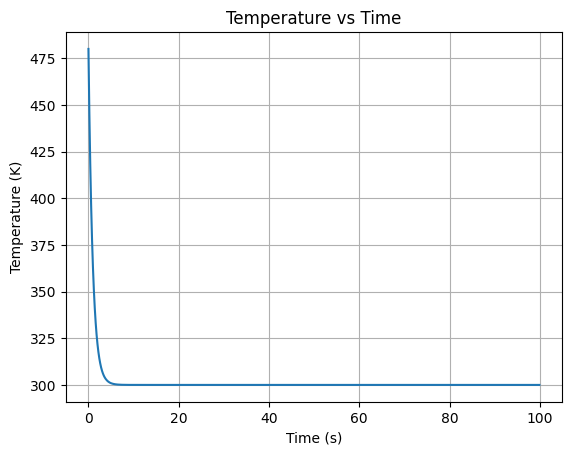

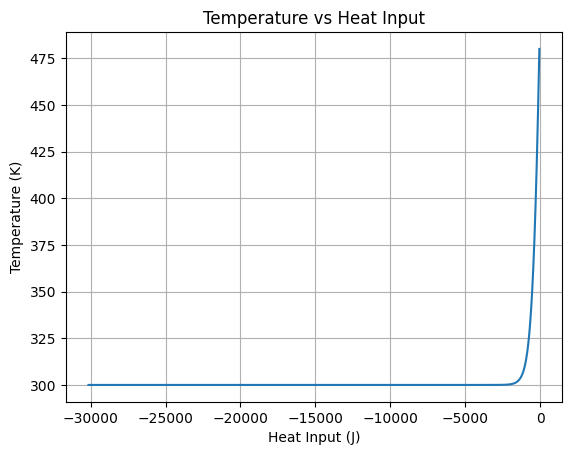

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
thermal_conductivity = 0.1  # Thermal conductivity (W/mK)
surface_area = 1            # Surface area (m^2)
thickness = 0.1             # Thickness (m)
final_temperature = 300     # Final temperature (K)
initial_temperature = 500   # Initial temperature (K)
initial_time = 0            # Initial time (s)
time_step = 0.1             # Time step (s)
final_time = 100            # Final time (s)

# Function to calculate dQ/dt
def heat_rate(T):
    return -thermal_conductivity * surface_area * (T - final_temperature) / thickness

# Function to solve the differential equation numerically
def solve_differential_eqn():
    T = initial_temperature
    time = np.arange(initial_time, final_time, time_step)
    temp_values = []
    for t in time:
        dQdt = heat_rate(T)
        dT = dQdt * time_step
        T += dT
        temp_values.append(T)
    return time, temp_values

# Calculate temperature as a function of time
time, temp_values = solve_differential_eqn()

# Calculate heat input Q as a function of time
heat_input = np.cumsum(-np.array(temp_values) * time_step * thermal_conductivity * surface_area / thickness)

# Calculate specific heat capacity Cp/V
slope, _ = np.polyfit(heat_input[:-1], temp_values[:-1], 1)
specific_heat_capacity = slope
print("Specific heat capacity Cp/V:", specific_heat_capacity)

# Plot temperature versus time
plt.plot(time, temp_values)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs Time')
plt.grid(True)
plt.show()

# Plot temperature versus heat input
plt.plot(heat_input[:-1], temp_values[:-1])
plt.xlabel('Heat Input (J)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs Heat Input')
plt.grid(True)
plt.show()
